In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
print(train.describe())

             season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.96047

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train['hour']=[t.hour for t in pd.DatetimeIndex(train.datetime)]
train['day']=[t.dayofweek for t in pd.DatetimeIndex(train.datetime)]
train['month']=[t.month for t in pd.DatetimeIndex(train.datetime)]
train['year']=[t.year for t in pd.DatetimeIndex(train.datetime)]
train.drop(['datetime'],inplace=True,axis=1)
train.drop(['workingday'],inplace=True,axis=1)
train.head()

,season,holiday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011
1,1,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011
2,1,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011
3,1,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,2011
4,1,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,2011


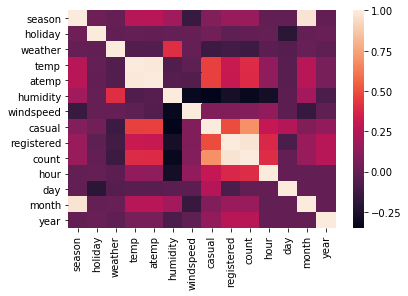

In [5]:
tc = train.corr()
sns.heatmap(tc)

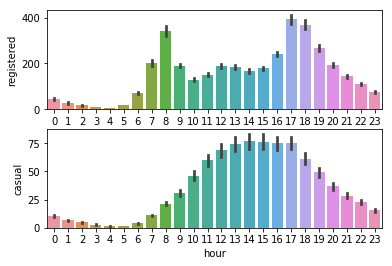

In [6]:
fig,axes = plt.subplots(nrows = 2,ncols = 1)

#registered and casual rentals vs hour 
sns.barplot(data=train,x='hour',y='registered',ax=axes[0])
sns.barplot(data=train,x='hour',y='casual',ax=axes[1])


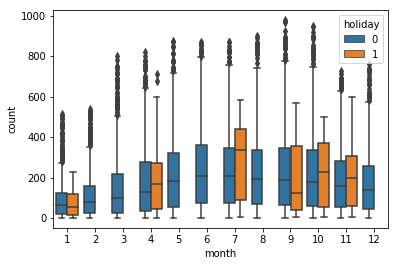

In [7]:
sns.boxplot(x = 'month',y = 'count',data = train,hue = 'holiday')

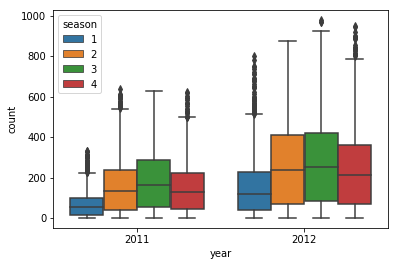

In [8]:
sns.boxplot(x = 'year',y = 'count',data = train,hue = 'season')

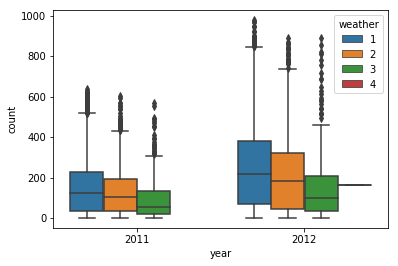

In [9]:
sns.boxplot(x = 'year',y = 'count',data = train,hue = 'weather')

In [10]:
from sklearn import linear_model
from sklearn import metrics
import statsmodels.api as sm

In [11]:
test = train.iloc[:, 9].values


In [12]:
train.drop(['registered'],inplace=True,axis=1)
train.drop(['casual'],inplace=True,axis=1)
train.drop(['count'],inplace=True,axis=1)
train.head()


,season,holiday,weather,temp,atemp,humidity,windspeed,hour,day,month,year
0,1,0,1,9.84,14.395,81,0.0,0,5,1,2011
1,1,0,1,9.02,13.635,80,0.0,1,5,1,2011
2,1,0,1,9.02,13.635,80,0.0,2,5,1,2011
3,1,0,1,9.84,14.395,75,0.0,3,5,1,2011
4,1,0,1,9.84,14.395,75,0.0,4,5,1,2011


In [13]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size = 1/5, random_state = 0)

regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[268.8 311.9 243.1 ... 742.9 412.7  91. ]
[244 239 229 ... 627 450  75]


In [14]:
regressor_ols = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1737.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:31:10   Log-Likelihood:                -55815.
No. Observations:                8708   AIC:                         1.117e+05
Df Residuals:                    8697   BIC:                         1.117e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        -9.3963      6.025     -1.559      0.119     -21.207       2.415
holiday       -5.4426      9.573     -0.569      0.570     -24.207      13.322
weather       -3.2932      2.813     -1.171      0.242      -8.808       2.222
temp           2.9327      1.172      2.503      0.012       0.636       5.230
atemp          3.7125      1.078      3.445      0.001       1.600       5.825
humidity      -2.2955      0.102    -22.462      0.000      -2.496      -2.095
windspeed      0.1506      0.211      0.715      0.475      -0.262       0.564
hour           7.6022      0.241     31.577      0.000       7.130       8.074
day           -0.2300      0.804     -0.286      0.775      -1.806       1.346
month         10.7157      1.956      5.478      0.000       6.881      14.550
year           0.0277      0.005      5.480      0.000       0.018       0.038
==============================================================================
Omnibus:                     2101.699   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4768.161
Skew:                           1.370   Prob(JB):                         0.00
Kurtosis:                       5.374   Cond. No.                     1.23e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
X_train.drop(['holiday'],inplace=True,axis=1)
X_test.drop(['holiday'],inplace=True,axis=1)

regressor_ols = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_ols.summary()

/home/sarath/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     1911.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:31:10   Log-Likelihood:                -55815.
No. Observations:                8708   AIC:                         1.117e+05
Df Residuals:                    8698   BIC:                         1.117e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        -9.7959      5.984     -1.637      0.102     -21.526       1.934
weather       -3.2641      2.813     -1.160      0.246      -8.778       2.250
temp           2.9085      1.171      2.484      0.013       0.613       5.204
atemp          3.7364      1.077      3.470      0.001       1.626       5.847
humidity      -2.2962      0.102    -22.472      0.000      -2.497      -2.096
windspeed      0.1507      0.211      0.715      0.474      -0.262       0.564
hour           7.6011      0.241     31.575      0.000       7.129       8.073
day           -0.1415      0.789     -0.179      0.858      -1.688       1.405
month         10.8397      1.944      5.576      0.000       7.029      14.650
year           0.0275      0.005      5.458      0.000       0.018       0.037
==============================================================================
Omnibus:                     2105.530   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4785.202
Skew:                           1.372   Prob(JB):                         0.00
Kurtosis:                       5.380   Cond. No.                     8.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
X_train.drop(['day'],inplace=True,axis=1)
X_test.drop(['day'],inplace=True,axis=1)
regressor_ols = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2124.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:31:10   Log-Likelihood:                -55815.
No. Observations:                8708   AIC:                         1.116e+05
Df Residuals:                    8699   BIC:                         1.117e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        -9.7661      5.981     -1.633      0.103     -21.491       1.959
weather       -3.2508      2.812     -1.156      0.248      -8.762       2.261
temp           2.9062      1.171      2.482      0.013       0.611       5.201
atemp          3.7399      1.076      3.474      0.001       1.630       5.850
humidity      -2.2958      0.102    -22.475      0.000      -2.496      -2.096
windspeed      0.1522      0.211      0.723      0.470      -0.261       0.565
hour           7.6014      0.241     31.579      0.000       7.130       8.073
month         10.8293      1.943      5.574      0.000       7.021      14.638
year           0.0273      0.005      5.656      0.000       0.018       0.037
==============================================================================
Omnibus:                     2107.670   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4794.794
Skew:                           1.372   Prob(JB):                         0.00
Kurtosis:                       5.383   Cond. No.                     8.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
X_train.drop(['weather'],inplace=True,axis=1)
X_test.drop(['weather'],inplace=True,axis=1)

regressor_ols = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2389.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:31:10   Log-Likelihood:                -55816.
No. Observations:                8708   AIC:                         1.116e+05
Df Residuals:                    8700   BIC:                         1.117e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        -9.7990      5.981     -1.638      0.101     -21.524       1.926
temp           2.8785      1.171      2.459      0.014       0.584       5.173
atemp          3.7707      1.076      3.504      0.000       1.661       5.880
humidity      -2.3487      0.091    -25.725      0.000      -2.528      -2.170
windspeed      0.1168      0.208      0.560      0.575      -0.292       0.525
hour           7.5728      0.239     31.627      0.000       7.103       8.042
month         10.8759      1.943      5.599      0.000       7.068      14.684
year           0.0268      0.005      5.579      0.000       0.017       0.036
==============================================================================
Omnibus:                     2110.499   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4809.614
Skew:                           1.373   Prob(JB):                         0.00
Kurtosis:                       5.390   Cond. No.                     8.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
X_train.drop(['windspeed'],inplace=True,axis=1)
X_test.drop(['windspeed'],inplace=True,axis=1)

regressor_ols = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     2730.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:31:11   Log-Likelihood:                -55816.
No. Observations:                8708   AIC:                         1.116e+05
Df Residuals:                    8701   BIC:                         1.117e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
season        -9.8606      5.980     -1.649      0.099     -21.583       1.862
temp           3.0104      1.147      2.625      0.009       0.763       5.258
atemp          3.6454      1.053      3.463      0.001       1.582       5.709
humidity      -2.3621      0.088    -26.800      0.000      -2.535      -2.189
hour           7.5837      0.239     31.779      0.000       7.116       8.051
month         10.8729      1.942      5.597      0.000       7.065      14.681
year           0.0281      0.004      6.727      0.000       0.020       0.036
==============================================================================
Omnibus:                     2109.138   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4803.597
Skew:                           1.373   Prob(JB):                         0.00
Kurtosis:                       5.388   Cond. No.                     8.01e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
X_train.drop(['season'],inplace=True,axis=1)
X_test.drop(['season'],inplace=True,axis=1)

regressor_ols = sm.OLS(endog = y_train, exog = X_train).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     3184.
Date:                Mon, 29 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:31:11   Log-Likelihood:                -55818.
No. Observations:                8708   AIC:                         1.116e+05
Df Residuals:                    8702   BIC:                         1.117e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
temp           2.9956      1.147      2.612      0.009       0.748       5.243
atemp          3.6483      1.053      3.466      0.001       1.585       5.712
humidity      -2.3583      0.088    -26.763      0.000      -2.531      -2.186
hour           7.5884      0.239     31.798      0.000       7.121       8.056
month          7.7718      0.486     15.997      0.000       6.819       8.724
year           0.0259      0.004      6.547      0.000       0.018       0.034
==============================================================================
Omnibus:                     2110.347   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4804.437
Skew:                           1.374   Prob(JB):                         0.00
Kurtosis:                       5.386   Cond. No.                     1.98e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
print(y_pred)
print(y_test)

[213.3 237.2 246.5 ... 660.9 349.2  44.8]
[244 239 229 ... 627 450  75]


In [21]:
temp = train = pd.read_csv('train.csv')
temp['hour']=[t.hour for t in pd.DatetimeIndex(temp.datetime)]
temp['day']=[t.dayofweek for t in pd.DatetimeIndex(temp.datetime)]
temp['month']=[t.month for t in pd.DatetimeIndex(temp.datetime)]
temp['year']=[t.year for t in pd.DatetimeIndex(temp.datetime)]
temp.drop(['datetime'],inplace=True,axis=1)
temp.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1,2011


In [22]:
test = temp[['temp','atemp','humidity','hour','month','year']]
y_pred = regressor.predict(test)

In [23]:
print(y_pred)

[ 26.3  31.4  27.2 ... 174.7 140.7 108.3]
